In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
from pykeepass import PyKeePass
pd.set_option('max_columns', 500)
import datetime
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [143]:
keepass_database = "C:\\Users\\tarun.hasija\Desktop\S_AG_Files\\tarunhasija_keypass.kdbx"
keepass_password = input("Enter Keepass Password")
kp = PyKeePass(keepass_database, password=keepass_password)
entry = kp.find_entries(title="fred_api_key")

In [144]:
fred_key = entry[0].password

In [145]:
fred = Fred(api_key=fred_key)

# Search for Economic data

In [146]:
fred.search('S&P',order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-04-08,2023-04-08,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-04-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-06 09:01:02-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-04-08,2023-04-08,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-03-30 10:39:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-04-08,2023-04-08,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-04-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-06 09:01:06-05:00,84,This data represents the effective yield of th...
SP500,SP500,2023-04-08,2023-04-08,S&P 500,2013-04-08,2023-04-06,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-06 19:10:50-05:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-04-08,2023-04-08,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-03-30 10:39:01-05:00,81,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LABSHPRUA156NRUG,LABSHPRUA156NRUG,2023-04-08,2023-04-08,Share of Labour Compensation in GDP at Current...,1970-01-01,2019-01-01,Annual,A,Ratio,Ratio,Not Seasonally Adjusted,NSA,2021-01-21 13:28:47-06:00,3,Source ID: labsh When using these data in you...
LABSHPIDA156NRUG,LABSHPIDA156NRUG,2023-04-08,2023-04-08,Share of Labour Compensation in GDP at Current...,1960-01-01,2019-01-01,Annual,A,Ratio,Ratio,Not Seasonally Adjusted,NSA,2021-01-21 13:33:28-06:00,3,Source ID: labsh When using these data in you...
M0829AUSM065NNBR,M0829AUSM065NNBR,2023-04-08,2023-04-08,"Average Hours of Work Per Week, Manufacturing ...",1920-06-01,1948-07-01,Monthly,M,Hours,Hours,Not Seasonally Adjusted,NSA,2012-08-17 14:18:52-05:00,3,Series Is Presented Here As Two Variables--(1)...


# Pull the SP 500 data

In [147]:
sp500 = fred.get_series('SP500')

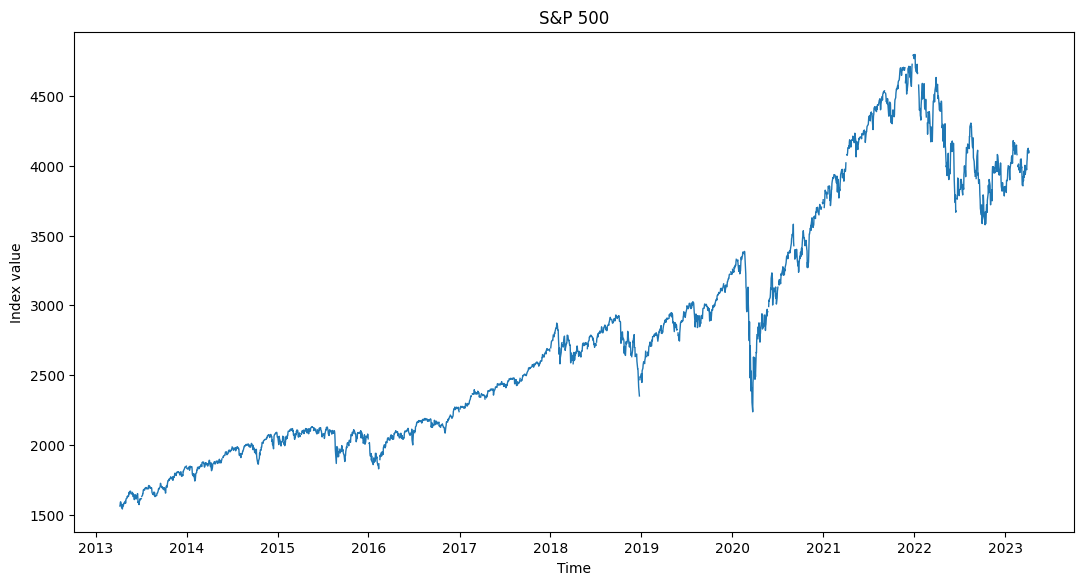

In [148]:
figure = plt.figure(figsize=(10,5))
ax = figure.add_axes((0,0,1,1))
ax.set_title("S&P 500")
ax.set_xlabel("Time")
ax.set_ylabel("Index value")
ax.plot(sp500,linewidth = 1)

# Unemployment data from FRED

In [149]:
unemp_df = fred.search("unemployment rate state",filter=('frequency','Monthly'))
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['seasonal_adjustment'] == "Seasonally Adjusted"]

unemp_df = unemp_df.loc[unemp_df.index.str.contains('UR')]
unemp_df = unemp_df.loc[~unemp_df['title'].str.contains('Census')]

unemp_df['title'] = unemp_df['title'].str.replace('Unemployment Rate in','')

unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-04-08,2023-04-08,California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,57,None
FLUR,FLUR,2023-04-08,2023-04-08,Florida,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,51,None
NYUR,NYUR,2023-04-08,2023-04-08,New York,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,51,None
TXUR,TXUR,2023-04-08,2023-04-08,Texas,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:02-05:00,50,None
PAUR,PAUR,2023-04-08,2023-04-08,Pennsylvania,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,40,None
ILUR,ILUR,2023-04-08,2023-04-08,Illinois,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:12-05:00,29,None
OHUR,OHUR,2023-04-08,2023-04-08,Ohio,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,39,None
NCUR,NCUR,2023-04-08,2023-04-08,North Carolina,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:09-05:00,32,None
ALUR,ALUR,2023-04-08,2023-04-08,Alabama,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,37,None


In [150]:
# unemp_df.to_csv("states_unemployment_series_info.csv")
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-04-08,2023-04-08,California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,57,None
FLUR,FLUR,2023-04-08,2023-04-08,Florida,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,51,None
NYUR,NYUR,2023-04-08,2023-04-08,New York,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,51,None
TXUR,TXUR,2023-04-08,2023-04-08,Texas,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:02-05:00,50,None
PAUR,PAUR,2023-04-08,2023-04-08,Pennsylvania,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,40,None
ILUR,ILUR,2023-04-08,2023-04-08,Illinois,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:12-05:00,29,None
OHUR,OHUR,2023-04-08,2023-04-08,Ohio,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,39,None
NCUR,NCUR,2023-04-08,2023-04-08,North Carolina,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:09-05:00,32,None
ALUR,ALUR,2023-04-08,2023-04-08,Alabama,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,37,None


In [151]:
unrate_series = fred.get_series("UNRATE")
unrate_df = pd.DataFrame(unrate_series,index=pd.to_datetime(unrate_series.index).date,columns=['Unemployment Percentage'])

In [152]:
states_unemployment_data = []
for state in unemp_df.index:
    state_unemployment_series = fred.get_series(state)
    state_unemployment_df = pd.DataFrame(state_unemployment_series, index = pd.to_datetime(state_unemployment_series.index).date, columns=[unemp_df.loc[state,'title']])
    states_unemployment_data.append(state_unemployment_df)

In [153]:
# states_unemployment_data
states_unemployment_df = pd.concat(states_unemployment_data,axis='columns')

In [154]:
#Concat Unemployment rate with States unemployment data
consolidated_unemp_df = pd.concat([unrate_df,states_unemployment_df],axis='columns')

In [155]:
# Drop rows before Jan 1st 1976 as they don't have State UnEmployment Data
consolidated_unemp_df = consolidated_unemp_df.drop(consolidated_unemp_df[consolidated_unemp_df.index < datetime.date(1976,1,1)].index, axis='index')

In [156]:
consolidated_unemp_df

,Unemployment Percentage,California,Florida,New York,Texas,Pennsylvania,Illinois,Ohio,North Carolina,Alabama,Michigan,Minnesota,Colorado,New Jersey,Tennessee,Massachusetts,Wisconsin,Virginia,Kentucky,Georgia,Washington,West Virginia,Missouri,Indiana,New Mexico,Alaska,Iowa,South Carolina,Arizona,Arkansas,Oregon,Oklahoma,Utah,Nevada,North Dakota,Maryland,Louisiana,Nebraska,Kansas,Connecticut,Idaho,South Dakota,Puerto Rico,Wyoming,the District of Columbia,Maine,Montana,Hawaii,Rhode Island,Delaware,New Hampshire,Mississippi,Vermont
1976-01-01,7.9,9.2,9.7,10.3,5.8,8.0,6.6,8.1,6.4,6.6,9.9,6.0,5.8,10.3,6.0,10.5,5.8,6.1,5.6,8.4,8.5,7.5,5.9,6.6,8.6,7.1,4.3,7.4,10.2,7.3,9.5,5.8,5.8,9.2,3.4,6.4,6.3,3.3,4.2,9.8,5.6,3.3,19.6,4.1,8.7,8.7,5.8,9.8,7.8,8.0,6.5,6.7,8.6
1976-02-01,7.7,9.2,9.7,10.3,5.8,8.1,6.6,8.1,6.4,6.6,9.9,6.0,5.7,10.3,6.0,10.5,5.8,6.1,5.6,8.4,8.5,7.5,5.9,6.6,8.7,7.1,4.3,7.4,10.2,7.3,9.5,5.8,5.9,9.2,3.4,6.4,6.3,3.3,4.2,9.8,5.6,3.3,19.5,4.1,8.7,8.7,5.8,9.8,7.8,8.0,6.5,6.7,8.6
1976-03-01,7.6,9.1,9.6,10.2,5.9,8.1,6.6,8.1,6.4,6.6,9.9,5.9,5.7,10.3,6.0,10.5,5.7,6.1,5.6,8.4,8.4,7.5,5.9,6.5,8.7,7.0,4.3,7.3,10.1,7.3,9.4,5.8,5.8,9.2,3.4,6.4,6.3,3.3,4.2,9.8,5.6,3.2,19.3,4.1,8.6,8.6,5.8,9.8,7.7,8.0,6.5,6.6,8.6
1976-04-01,7.7,9.1,9.5,10.2,5.9,8.1,6.6,8.0,6.3,6.5,9.8,5.8,5.6,10.3,6.0,10.3,5.6,6.0,5.6,8.3,8.5,7.5,6.0,6.3,8.6,6.9,4.2,7.2,10.0,7.2,9.2,5.8,5.8,9.0,3.5,6.4,6.4,3.2,4.2,9.6,5.6,3.1,19.0,4.0,8.5,8.6,5.8,9.7,7.7,8.1,6.5,6.4,8.6
1976-05-01,7.4,9.0,9.3,10.1,5.9,8.1,6.6,7.8,6.1,6.4,9.6,5.7,5.6,10.3,5.9,10.1,5.5,5.9,5.5,8.1,8.5,7.4,6.0,6.0,8.6,6.9,4.1,7.0,9.8,7.1,9.1,5.7,5.7,8.9,3.6,6.5,6.5,3.1,4.2,9.4,5.6,3.1,18.9,3.9,8.4,8.5,5.8,9.4,7.7,8.3,6.5,6.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,3.6,4.1,2.7,4.1,3.8,4.4,4.6,4.1,3.9,2.6,4.4,3.0,2.8,3.3,3.5,3.7,3.0,3.2,3.9,3.1,4.6,4.1,2.7,3.2,3.5,3.7,3.1,3.3,4.0,3.5,4.8,3.2,2.4,5.5,2.1,3.1,3.6,2.7,2.9,4.0,2.8,2.2,6.0,3.9,4.2,3.1,2.7,3.7,3.3,4.7,2.9,4.1,3.1
2022-12-01,3.5,4.1,2.7,4.1,3.8,4.3,4.6,4.1,3.8,2.6,4.3,2.9,2.8,3.3,3.5,3.7,3.0,3.1,3.9,3.1,4.5,4.1,2.7,3.1,3.5,3.7,3.0,3.3,4.0,3.4,4.8,3.2,2.4,5.5,2.1,3.0,3.5,2.7,2.9,4.0,2.8,2.2,6.0,3.9,4.2,3.1,2.6,3.7,3.2,4.6,2.9,4.0,3.0
2023-01-01,3.4,4.2,2.6,4.2,3.9,4.3,4.5,4.0,3.8,2.6,4.3,2.9,2.8,3.4,3.5,3.5,2.9,3.2,3.9,3.1,4.6,3.9,2.7,3.1,3.5,3.8,3.0,3.2,3.8,3.4,4.8,3.1,2.4,5.5,2.1,3.0,3.5,2.5,2.9,3.9,2.7,2.1,6.0,3.9,4.5,2.9,2.5,3.6,3.1,4.6,2.8,3.9,2.9
2023-02-01,3.6,4.3,2.6,4.2,4.0,4.4,4.5,3.9,3.6,2.5,4.3,3.0,2.9,3.5,3.5,3.7,2.7,3.2,3.9,3.1,4.6,3.7,2.6,3.1,3.6,3.8,2.9,3.2,3.7,3.2,4.7,3.0,2.4,5.5,2.1,2.9,3.6,2.3,2.9,4.0,2.6,2.1,6.0,3.8,4.7,2.8,2.4,3.6,3.1,4.6,2.7,3.7,2.8


In [177]:
# Remove leading whitespaces from Column names
updated_column_names = []
for column in consolidated_unemp_df.columns:
    updated_column_names.append(column.strip())
    

consolidated_unemp_df.columns = updated_column_names

In [179]:
consolidated_unemp_df.loc[:, ["Unemployment Percentage","Minnesota", "Illinois"]].iplot()